# Imports

In [2]:
import pyabf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# Load your data
For data containing multiple sweeps, sweep 0 is automatically loaded unless otherwise specified. Printing your abf will show you the file information (channels, sampling rate, number of sweeps, length of sweep window, protocol used)

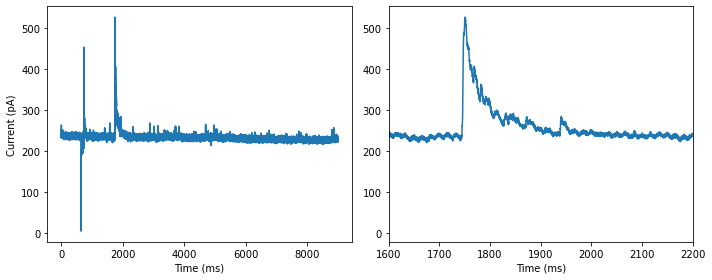

In [3]:
#load data file by filling in file path
data = r"C:\Users\Valerie\Documents\Tejeda_Lab\4_ephys_data\analysis\dyn project\val\Cre-ON\0428_pfc\2023_04_28_0013.abf"
abf = pyabf.ABF(data)

# Set the sweep and channel for plotting below
sweep = abf.setSweep(sweepNumber=1, channel=0)
 
# Define the variables
time = abf.sweepX*1000 # in miliseconds
voltage = abf.sweepY
current = abf.sweepC

fig = plt.figure(figsize=(10, 4))
ax1 = fig.add_subplot(121)
ax1.plot(time, voltage)
ax1.set_xlabel('Time (ms)')
ax1.set_ylabel('Current (pA)')

# Time Window
ax2 = fig.add_subplot(122)
ax2.plot(time, voltage)
ax2.set_xlabel('Time (ms)')
ax2.set_xlim(1600,2200)
plt.tight_layout()
plt.show()

In [4]:
stim = range(32000, 42000) #time window to search for peak in (values should be 20 * 'timestamp_in_ms')

In [7]:
amp = []
sweeps = []

for sweep in abf.sweepList:
    abf.setSweep(sweep)
    sweeps.append(sweep)
    
    time = abf.sweepX*1000
    voltage = abf.sweepY
    current = abf.sweepC
    
    amp.append(max(voltage[stim]) - voltage[stim[0]])

df = pd.DataFrame({'sweep': sweeps, 'peak amplitude' : amp})    

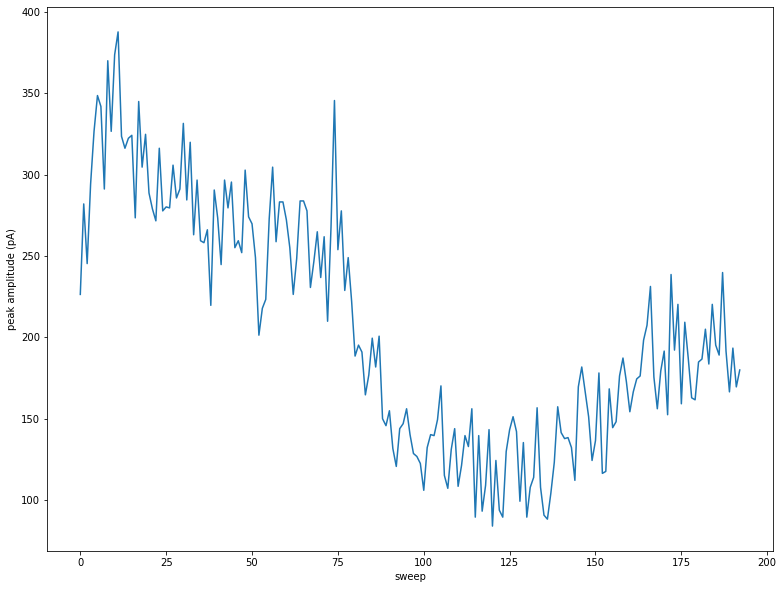

In [15]:
fig,ax1 = plt.subplots(figsize=(13,10))
ax1.plot(df['sweep'], df['peak amplitude'])
ax1.set_xlabel('sweep')
ax1.set_ylabel('peak amplitude (pA)')
plt.show()